In [1]:
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.utils import np_utils
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt
import os, shutil

import os

Using TensorFlow backend.


In [2]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/home/yanto/Learn/HWKeras/FC/dataset'

# The directory where we will
# store our smaller dataset
base_dir = '/home/yanto/Learn/HWKeras/FC/datatrain'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [3]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
train_data_dir = '/home/yanto/Learn/HWKeras/FC/datatrain/train'
validation_data_dir = '/home/yanto/Learn/HWKeras/FC/datatrain/validation'

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(32, 32),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 32, 32, 3)
labels batch shape: (32,)


In [7]:
from keras.models import load_model
model = load_model('imagenet_train.h5')

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 384)         885120    
__________

In [ ]:
model.trainable = False

In [ ]:
model.trainable = True

In [ ]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

In [9]:
model.layers.pop() # Get rid of the classification layer
model.layers.pop() # Get rid of the dropout layer
model.outputs = [model.layers[-2].output]
model.layers[-1].outbound_nodes = []

In [10]:
model.add(Dense(1, activation='sigmoid',name='dense_6' ))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 384)         885120    
__________

In [12]:
# Freeze the layers except the last 4 layers
for layer in model.layers[:-5]:
    layer.trainable = False

for layer in model.layers:
    print(layer, layer.trainable)

<keras.layers.convolutional.Conv2D object at 0x7f0f4f7037b8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0f4f703e80> False
<keras.layers.normalization.BatchNormalization object at 0x7f0f4f69df28> False
<keras.layers.convolutional.Conv2D object at 0x7f0f4f703c50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0f4f621470> False
<keras.layers.normalization.BatchNormalization object at 0x7f0f4f69deb8> False
<keras.layers.convolutional.Conv2D object at 0x7f0f4f621eb8> False
<keras.layers.convolutional.Conv2D object at 0x7f0f4eba8eb8> False
<keras.layers.convolutional.Conv2D object at 0x7f0f4eaa8b70> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0f4ea49d68> False
<keras.layers.normalization.BatchNormalization object at 0x7f0f4eb47d68> False
<keras.layers.core.Flatten object at 0x7f0f4ea49fd0> False
<keras.layers.core.Dense object at 0x7f0f4e7c5198> True
<keras.layers.core.Dropout object at 0x7f0f4c67eb38> True
<keras.layers.core.Dense object at 0x7f0f4c67ec88> Tru

In [ ]:
# Add new layers
model.add(Dense(4096, activation='relu', name='dense_4'))
model.add(Dropout(0.5, name = 'dropout_3'))
model.add(Dense(4096, activation='relu', name='dense_5'))
model.add(Dropout(0.5, name = 'dropout_4'))
model.add(Dense(1, activation='sigmoid',name='dense_6' ))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 384)         885120    
__________

/home/yanto/envi/tfpy3.5/lib/python3.5/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [ ]:
for layer in model.layers:
    print(layer, layer.trainable)

In [14]:
#from keras.optimizers import SGD
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
#opt = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              #optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [15]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/25
100/100 [==============================] - 22s 224ms/step - loss: 0.8185 - acc: 0.5453 - val_loss: 0.6332 - val_acc: 0.6358
Epoch 2/25
100/100 [==============================] - 21s 210ms/step - loss: 0.7692 - acc: 0.5915 - val_loss: 0.6297 - val_acc: 0.6495
Epoch 3/25
100/100 [==============================] - 21s 211ms/step - loss: 0.7534 - acc: 0.6056 - val_loss: 0.6236 - val_acc: 0.6624
Epoch 4/25
100/100 [==============================] - 21s 212ms/step - loss: 0.7813 - acc: 0.5706 - val_loss: 0.6065 - val_acc: 0.6856
Epoch 5/25
100/100 [==============================] - 21s 212ms/step - loss: 0.7562 - acc: 0.5922 - val_loss: 0.6030 - val_acc: 0.6840
Epoch 6/25
100/100 [==============================] - 22s 215ms/step - loss: 0.7469 - acc: 0.6003 - val_loss: 0.6124 - val_acc: 0.6701
Epoch 7/25
100/100 [==============================] - 23s 230ms/step - loss: 0.7480 - acc: 0.6087 - val_loss: 0.6021 - val_acc: 0.6808
Epoch 8/25
100/100 [==============================] - 2

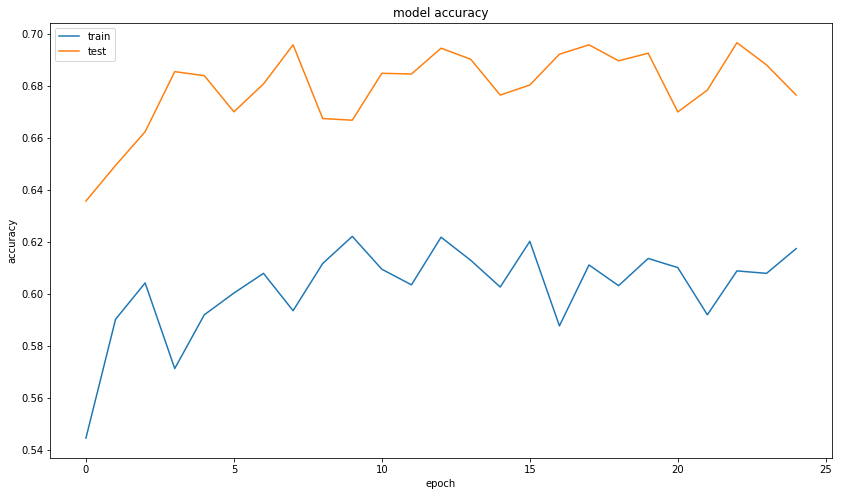

In [16]:
# summarize history for accuracy

plt.figure(figsize=(14,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

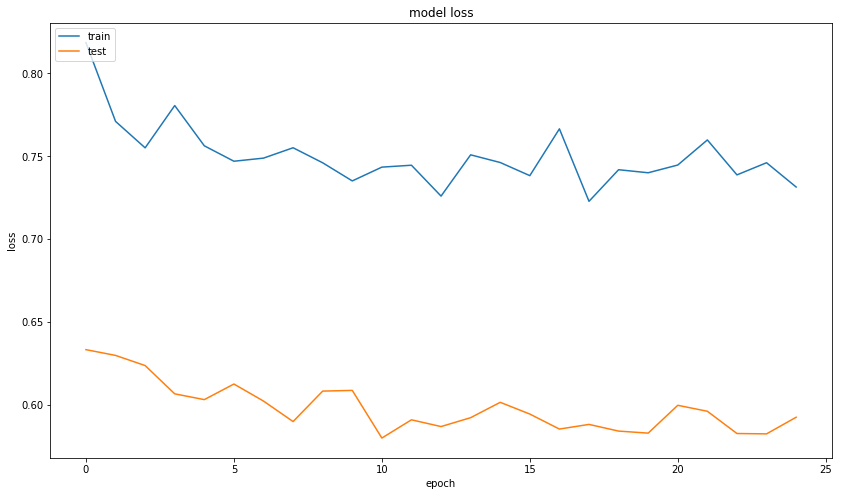

In [17]:
# summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()